In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data= pd.read_csv(r"C:\Users\light\global-child-marriage-data\dataset.csv")


In [3]:
df_childM= data.copy()

### exploring the data

In [4]:
df_childM.head()

,Countries and areas,Married by 15 Female,Married by 18 Feamle,Reference Year Female,Data Source Female,Married by 18 Male,Reference Year Male,Data Source Male
0,Afghanistan,4,28,2017.0,ALCS 2016-17,7,2015.0,DHS 2015
1,Albania,1,12,2018.0,DHS 2017-18,1,2018.0,DHS 2017-18
2,Algeria,0,4,2019.0,MICS 2019,-,NaN,NaN
3,Andorra,�,�,NaN,NaN,-,NaN,NaN
4,Angola,8,30,2016.0,DHS 2015-16,6,2016.0,DHS 2015-16


In [5]:
df_childM.dtypes

Countries and areas       object
Married by 15 Female      object
Married by 18 Feamle      object
Reference Year Female    float64
Data Source Female        object
Married by 18 Male        object
Reference Year Male      float64
Data Source Male          object
dtype: object

In [6]:
df_childM.describe()

,Reference Year Female,Reference Year Male
count,131.000000,96.000000
mean,2015.473282,2014.958333
std,3.486961,4.083127
min,2005.000000,2002.000000
25%,2013.000000,2012.000000
50%,2016.000000,2016.000000
75%,2018.000000,2018.000000
max,2020.000000,2020.000000


In [7]:
df_childM.isnull().sum()

Countries and areas        1
Married by 15 Female       2
Married by 18 Feamle       2
Reference Year Female     86
Data Source Female        86
Married by 18 Male         2
Reference Year Male      121
Data Source Male         121
dtype: int64

### Dealing with unwanted data points

In [8]:
df_childM['Married by 15 Female'][0]

'4'

In [9]:
df_childM['Married by 15 Female'][3]

'�'

In [10]:
df_childM['Married by 15 Female']

0       4
1       1
2       0
3       �
4       8
       ..
212    11
213     9
214    13
215    10
216     5
Name: Married by 15 Female, Length: 217, dtype: object

In [11]:
df_childM.where(df_childM == '�')

NumExpr defaulting to 8 threads.


,Countries and areas,Married by 15 Female,Married by 18 Feamle,Reference Year Female,Data Source Female,Married by 18 Male,Reference Year Male,Data Source Male
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,�,�,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,�,�,NaN,NaN,NaN,NaN,NaN
6,NaN,�,�,NaN,NaN,NaN,NaN,NaN
7,NaN,�,�,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,�,�,NaN,NaN,NaN,NaN,NaN


In [12]:
col= list(df_childM.columns)
for column in col:
    for element in df_childM[column]:
        if element in ['�', '?']:
            df_childM.replace(element, np.nan, inplace= True)

In [13]:
# checkpoint:
df_childM1= df_childM.copy()

In [14]:
df_childM1.shape

(217, 8)

In [15]:
# removing the row with all the null values:
df_childM1.dropna(axis= 0, how= 'all', inplace= True)

In [16]:
# resetting the index:
df_childM1.reset_index(drop= True)

,Countries and areas,Married by 15 Female,Married by 18 Feamle,Reference Year Female,Data Source Female,Married by 18 Male,Reference Year Male,Data Source Male
0,Afghanistan,4,28,2017.0,ALCS 2016-17,7,2015.0,DHS 2015
1,Albania,1,12,2018.0,DHS 2017-18,1,2018.0,DHS 2017-18
2,Algeria,0,4,2019.0,MICS 2019,-,NaN,NaN
3,Andorra,NaN,NaN,NaN,NaN,-,NaN,NaN
4,Angola,8,30,2016.0,DHS 2015-16,6,2016.0,DHS 2015-16
5,Anguilla,NaN,NaN,NaN,NaN,-,NaN,NaN
6,Antigua and Barbuda,NaN,NaN,NaN,NaN,-,NaN,NaN
7,Argentina,NaN,NaN,NaN,NaN,-,NaN,NaN
8,Armenia,0,5,2016.0,DHS 2015-16,0,2016.0,DHS 2015-16
9,Australia,NaN,NaN,NaN,NaN,-,NaN,NaN


In [17]:
# because the number of nan values are very high in this dataset so removing all the rows which have nan value:
df_childM2= df_childM1.dropna(axis= 0, how= 'any').reset_index(drop= True)
df_childM2.head()

,Countries and areas,Married by 15 Female,Married by 18 Feamle,Reference Year Female,Data Source Female,Married by 18 Male,Reference Year Male,Data Source Male
0,Afghanistan,4,28,2017.0,ALCS 2016-17,7,2015.0,DHS 2015
1,Albania,1,12,2018.0,DHS 2017-18,1,2018.0,DHS 2017-18
2,Angola,8,30,2016.0,DHS 2015-16,6,2016.0,DHS 2015-16
3,Armenia,0,5,2016.0,DHS 2015-16,0,2016.0,DHS 2015-16
4,Azerbaijan,2,11,2011.0,DHS 2011,0,2006.0,DHS 2006


In [18]:
df_childM2.dtypes

Countries and areas       object
Married by 15 Female      object
Married by 18 Feamle      object
Reference Year Female    float64
Data Source Female        object
Married by 18 Male        object
Reference Year Male      float64
Data Source Male          object
dtype: object

In [19]:
# renaming the columns name for better understanding:
df_childM2.rename(columns= {'Married by 15 Female' : 'Married by 15 Female(%)', 'Married by 18 Feamle' : 'Married by 18 Feamle(%)',
                  'Married by 18 Male' : 'Married by 18 Male(%)'}, inplace= True)
df_childM2.head()
    

,Countries and areas,Married by 15 Female(%),Married by 18 Feamle(%),Reference Year Female,Data Source Female,Married by 18 Male(%),Reference Year Male,Data Source Male
0,Afghanistan,4,28,2017.0,ALCS 2016-17,7,2015.0,DHS 2015
1,Albania,1,12,2018.0,DHS 2017-18,1,2018.0,DHS 2017-18
2,Angola,8,30,2016.0,DHS 2015-16,6,2016.0,DHS 2015-16
3,Armenia,0,5,2016.0,DHS 2015-16,0,2016.0,DHS 2015-16
4,Azerbaijan,2,11,2011.0,DHS 2011,0,2006.0,DHS 2006


In [20]:
# changing the dtype for some columns
column= ['Married by 15 Female(%)', 'Married by 18 Feamle(%)', 'Married by 18 Male(%)']

df_childM2[column]= df_childM2[column].astype(float)

In [21]:
# working on year columns:

for col in ['Reference Year Female', 'Reference Year Male']:
    df_childM2[col]= df_childM2[col].transform(lambda x: (x.astype(np.int64)).astype(str))

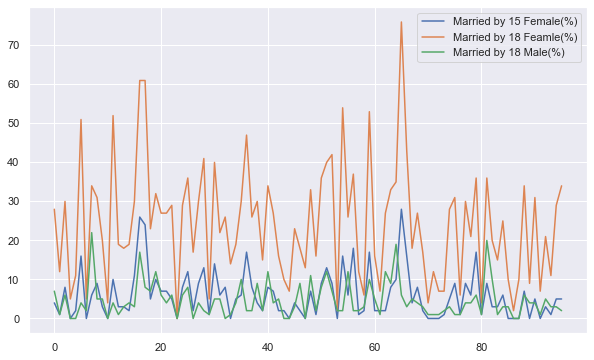

In [22]:
# if we plot this entire dataset:
df_childM2.plot(figsize= (10, 6))
plt.show()

## so in the given dataset the percentage of females married by 18 is highest.

In [23]:
df_childM2.describe()

,Married by 15 Female(%),Married by 18 Feamle(%),Married by 18 Male(%)
count,96.000000,96.00000,96.000000
mean,6.031250,24.37500,4.697917
std,6.006055,14.91467,4.521574
min,0.000000,0.00000,0.000000
25%,1.750000,12.00000,1.750000
50%,5.000000,25.50000,4.000000
75%,9.000000,33.00000,6.000000
max,28.000000,76.00000,22.000000


# we can find many information with this result:

###    mean:
###       1: mean % of 'Married by 15 Female(%)' is second highest, it is even highest then male percentages, 
###        2: 'Married by 18 Feamle(%)' is the highest. So almost 24% of females married by 18 years, 
###        3: by checking the mean % of 'Married by 18 Male(%)'(almost 5%), is the lowest, so we can say that even ###            males usually do not marry when they turn 18. 

###    std: from std value we can see that the data points are widely spread for "Married by 18 Feamle(%)", which is                   more the double from 'Married by 15 Female(%)' and almost more then 3 times then 'Married by18Male(%)'.
   
###      min and max: from min and max we can see that there are some countries where the percentage of marrige under 18(for both male and female) is 0. and and for some countries it is max, "Married by 15 Female(%)" is 28%, for 'Married by 18Feamle(%)' is 76%(highest) and for Married by 18 Male(%) is 22%
 
### %: 25% of 'Married by 15 Female(%)' is under 1.75%, 50% of 'Married by 15 Female(%)' is under 5% and 75% of 'Married by 15 Female(%)' is under 9%.    

###        we can find the values for the other two categories like this.

In [24]:
# checking the yearwise for females:

df_yearwise= df_childM2.groupby('Reference Year Female')[['Married by 15 Female(%)', 'Married by 18 Feamle(%)']].sum()
df_yearwise

,Married by 15 Female(%),Married by 18 Feamle(%)
Reference Year Female,,
2005,3.0,18.0
2006,0.0,7.0
2007,8.0,63.0
2010,23.0,93.0
2011,11.0,41.0
2012,62.0,228.0
2013,14.0,64.0
2014,26.0,141.0
2015,68.0,247.0


### highest cases for females(both for year 15 and 18) are registered in 2018.

In [25]:
df_yearwise.index

Index(['2005', '2006', '2007', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020'],
      dtype='object', name='Reference Year Female')

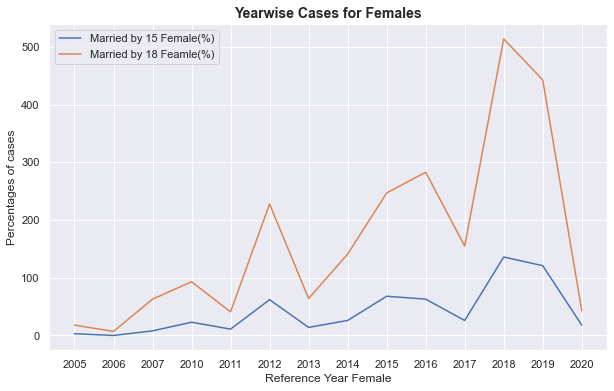

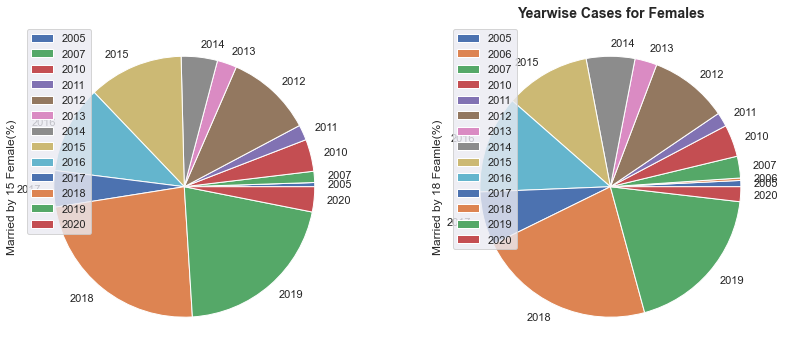

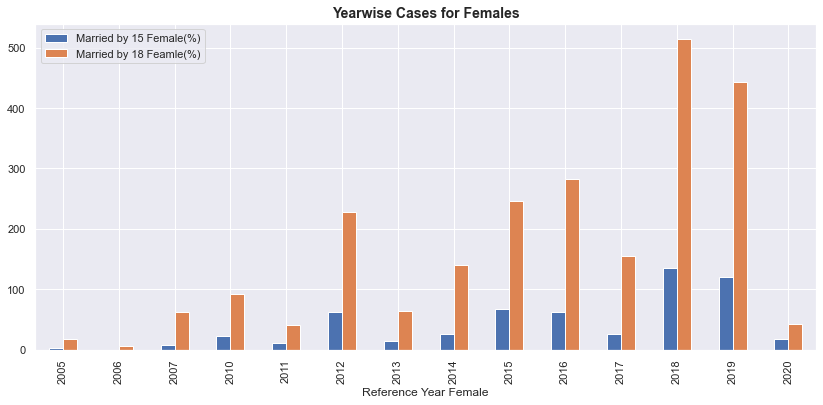

In [26]:
# lets see the difference from plot:


df_yearwise.plot(figsize= (10, 6), ylabel= 'Percentages of cases')
plt.xticks(ticks= range(0, len(df_yearwise)), labels= df_yearwise.index)
plt.title("Yearwise Cases for Females", size= 14, weight= 'bold')
plt.show()


df_yearwise.plot(kind= 'pie', subplots= True, figsize= (14, 6))
plt.title("Yearwise Cases for Females", size= 14, weight= 'bold')
plt.show()

df_yearwise.plot(kind= 'bar', figsize= (14, 6))
plt.title("Yearwise Cases for Females", size= 14, weight= 'bold')
plt.show()

### conclusion: clearly the percentage of "Married by 18 female" is very high and the highest cases came from year 2018

In [27]:
df_childM2['Data Source Female'].unique()

array(['ALCS 2016-17', 'DHS 2017-18', 'DHS 2015-16', 'DHS 2011',
       'MICS 2019', 'MICS 2015-16', 'DHS 2016', 'MICS 2011-12',
       'DHS 2010', 'DHS 2016-17', 'DHS 2005', 'DHS 2014', 'DHS 2018',
       'MICS 2018-2019', 'DHS 2015', 'DHS 2012', 'MICS 2014-15',
       'MICS 2016', 'MICS 2018', 'MICS 2017-2018', 'MICS 2014',
       'EPHS 2010', 'DHS 2011-12', 'NFHS 2015-16', 'DHS 2017',
       'MICS 2015', 'MICS 2017', 'DHS 2013', 'DHS 2007', 'AIS 2015',
       'ENDESA 2011-12', 'DHS 2016-18', 'MICS 2012', 'DHS 2014-15',
       'MICS 2019-2020', 'DHS 2019', 'SDHS 2020', 'MICS 2006'],
      dtype=object)

In [28]:
# if we check the same data for males
df_yearwise_male= df_childM2.groupby('Reference Year Male')['Married by 18 Male(%)'].sum()
df_yearwise_male

Reference Year Male
2002     1.0
2003     3.0
2005     6.0
2006     0.0
2007    24.0
2009     0.0
2010     7.0
2011     8.0
2012    71.0
2013    14.0
2014    17.0
2015    48.0
2016    63.0
2017    19.0
2018    78.0
2019    76.0
2020    16.0
Name: Married by 18 Male(%), dtype: float64

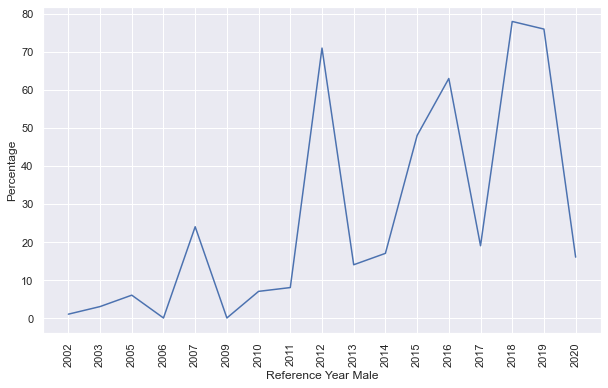

In [29]:
df_yearwise_male.plot(ylabel= 'Percentage',figsize= (10, 6))
plt.xticks(ticks= range(0, len(df_yearwise_male)), labels= df_yearwise_male.index, rotation= 'vertical')
plt.show()

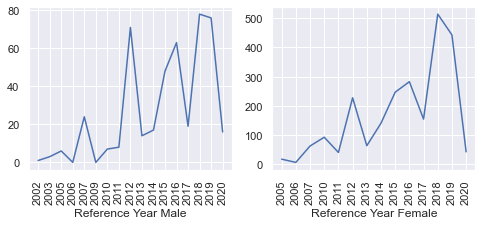

In [30]:
# if we compare it from 'Married by 18 female'

plt.subplot(1, 2, 1)
df_yearwise_male.plot(figsize= (8, 3))
plt.xticks(ticks= range(0, len(df_yearwise_male)), labels= df_yearwise_male.index, rotation= 'vertical')



plt.subplot(1, 2, 2)
df_yearwise['Married by 18 Feamle(%)'].plot()
plt.xticks(ticks= range(0, len(df_yearwise)), labels= df_yearwise.index, rotation= 'vertical')
plt.show()

In [31]:
# top 10 countries with highest percentage of "Married by 15 Female(%)":

df_childM2[['Countries and areas', 'Married by 15 Female(%)']].sort_values(by= 'Married by 15 Female(%)', ascending= False).head(10)


,Countries and areas,Married by 15 Female(%)
65,Niger,28.0
16,Central African Republic,26.0
17,Chad,24.0
56,Mauritania,18.0
79,Somalia,17.0
59,Mozambique,17.0
36,Guinea,17.0
66,Nigeria,16.0
54,Mali,16.0
5,Bangladesh,16.0


In [32]:
# top 10 countries with lowest percentage of "Married by 15 Female(%)":

df_childM2[['Countries and areas', 'Married by 15 Female(%)']].sort_values(by= 'Married by 15 Female(%)').head(10)


,Countries and areas,Married by 15 Female(%)
47,Kyrgyzstan,0.0
23,Democratic People's Republic of Korea,0.0
85,Tonga,0.0
86,Tunisia,0.0
71,Republic of Moldova,0.0
70,Qatar,0.0
87,Tuvalu,0.0
10,Bosnia and Herzegovina,0.0
72,Rwanda,0.0
33,Georgia,0.0


In [33]:
# top 10 countries with highest percentage of "Married by 18 Feamle(%)":

df_childM2[['Countries and areas', 'Married by 18 Feamle(%)']].sort_values(by= 'Married by 18 Feamle(%)', ascending= False).head(10)


,Countries and areas,Married by 18 Feamle(%)
65,Niger,76.0
17,Chad,61.0
16,Central African Republic,61.0
54,Mali,54.0
59,Mozambique,53.0
11,Burkina Faso,52.0
5,Bangladesh,51.0
36,Guinea,47.0
66,Nigeria,43.0
52,Malawi,42.0


In [34]:
# top 10 countries with lowest percentage of "Married by 18 Feamle(%)":

df_childM2[['Countries and areas', 'Married by 18 Feamle(%)']].sort_values(by= 'Married by 18 Feamle(%)').head(10)


,Countries and areas,Married by 18 Feamle(%)
23,Democratic People's Republic of Korea,0.0
53,Maldives,2.0
86,Tunisia,2.0
80,South Africa,4.0
70,Qatar,4.0
10,Bosnia and Herzegovina,4.0
29,Eswatini,5.0
3,Armenia,5.0
6,Belarus,5.0
76,Serbia,6.0


In [35]:
# checking these details for india:

df_childM2[df_childM2['Countries and areas'] == 'India']

,Countries and areas,Married by 15 Female(%),Married by 18 Feamle(%),Reference Year Female,Data Source Female,Married by 18 Male(%),Reference Year Male,Data Source Male
41,India,7.0,27.0,2016,NFHS 2015-16,4.0,2016,NFHS 2015-16


In [36]:
# checking the increment between "Married by 15 Female(%)", "Married by 18 Feamle(%)"
increment = df_childM2['Married by 18 Feamle(%)'].sub(df_childM2['Married by 15 Female(%)'])

# adding this column in the table

df_childM2.insert(loc= 3, column= 'increment b/w age 15 and 18(female)', value= increment)

In [37]:
df_childM2

,Countries and areas,Married by 15 Female(%),Married by 18 Feamle(%),increment b/w age 15 and 18(female),Reference Year Female,Data Source Female,Married by 18 Male(%),Reference Year Male,Data Source Male
0,Afghanistan,4.0,28.0,24.0,2017,ALCS 2016-17,7.0,2015,DHS 2015
1,Albania,1.0,12.0,11.0,2018,DHS 2017-18,1.0,2018,DHS 2017-18
2,Angola,8.0,30.0,22.0,2016,DHS 2015-16,6.0,2016,DHS 2015-16
3,Armenia,0.0,5.0,5.0,2016,DHS 2015-16,0.0,2016,DHS 2015-16
4,Azerbaijan,2.0,11.0,9.0,2011,DHS 2011,0.0,2006,DHS 2006
5,Bangladesh,16.0,51.0,35.0,2019,MICS 2019,4.0,2011,DHS 2011
6,Belarus,0.0,5.0,5.0,2019,MICS 2019,2.0,2019,MICS 2019
7,Belize,6.0,34.0,28.0,2016,MICS 2015-16,22.0,2016,MICS 2015-16
8,Benin,9.0,31.0,22.0,2018,DHS 2017-18,5.0,2018,DHS 2018
9,Bolivia (Plurinational State of),3.0,20.0,17.0,2016,DHS 2016,5.0,2016,DHS (ENDESA) 2016


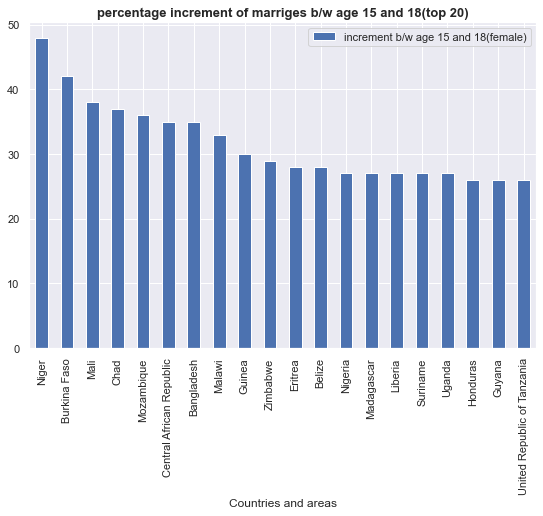

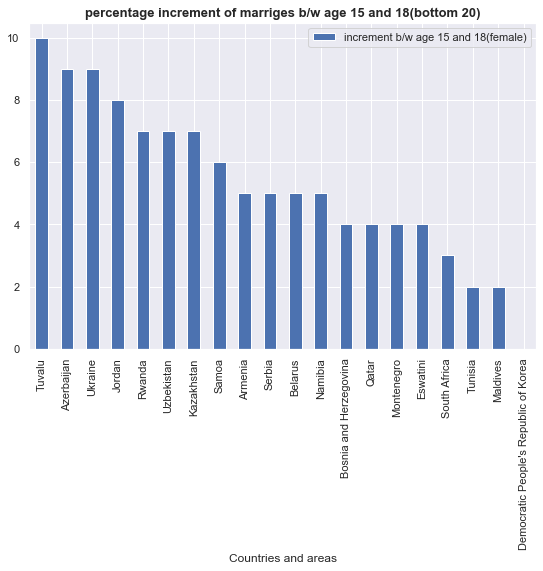

In [38]:
df_increment= df_childM2[['Countries and areas', 'increment b/w age 15 and 18(female)']].sort_values(by= 'increment b/w age 15 and 18(female)', ascending= False)

# checking the top 20 countries which had max increment of marriges between age 15 and 18:

ax1= plt.subplot(1, 2, 1)
df_increment.head(20).plot(kind= 'bar', x= 'Countries and areas', y= 'increment b/w age 15 and 18(female)', ax= ax1, figsize= (20, 6))
plt.title('percentage increment of marriges b/w age 15 and 18(top 20)', size= 13, weight= 'bold')
plt.show()

# checking the top 20 countries which had min increment of marriges between age 15 and 18:
ax2= plt.subplot(1, 2, 2)
df_increment.tail(20).plot(kind= 'bar', x= 'Countries and areas', y= 'increment b/w age 15 and 18(female)', ax= ax2, figsize= (20, 6))
plt.title('percentage increment of marriges b/w age 15 and 18(bottom 20)', size= 13, weight= 'bold')
plt.show()

plt.close(2)

In [39]:
# making checkpoint and dropping unnecessary columns
df_childM3= df_childM2.drop(columns= ['Data Source Female', 'Data Source Male'])
df_childM3.rename(columns= {'Married by 18 Feamle(%)': 'Married by 18 Female(%)'}, inplace= True)
df_childM3.head(3)

,Countries and areas,Married by 15 Female(%),Married by 18 Female(%),increment b/w age 15 and 18(female),Reference Year Female,Married by 18 Male(%),Reference Year Male
0,Afghanistan,4.0,28.0,24.0,2017,7.0,2015
1,Albania,1.0,12.0,11.0,2018,1.0,2018
2,Angola,8.0,30.0,22.0,2016,6.0,2016


### Checking the difference between male and female % of marrige for age 18. 

In [40]:
# creating the difference column
increment_age18= df_childM3['Married by 18 Female(%)'].sub(df_childM3['Married by 18 Male(%)'])
df_childM3.insert(loc= 6, column= 'difference for age 18 b/w male and female', value= increment_age18)

In [41]:
df_childM3.head()

,Countries and areas,Married by 15 Female(%),Married by 18 Female(%),increment b/w age 15 and 18(female),Reference Year Female,Married by 18 Male(%),difference for age 18 b/w male and female,Reference Year Male
0,Afghanistan,4.0,28.0,24.0,2017,7.0,21.0,2015
1,Albania,1.0,12.0,11.0,2018,1.0,11.0,2018
2,Angola,8.0,30.0,22.0,2016,6.0,24.0,2016
3,Armenia,0.0,5.0,5.0,2016,0.0,5.0,2016
4,Azerbaijan,2.0,11.0,9.0,2011,0.0,11.0,2006


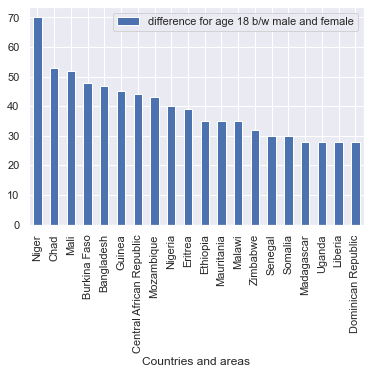

In [42]:
# lets examine it through plot

df_difference_18= df_childM3.sort_values(by= 'difference for age 18 b/w male and female').loc[:, ['Countries and areas', 'difference for age 18 b/w male and female']]


# top 20 countries which have large difference b/w male and female in age 18

df_difference_18.sort_values(by= 'difference for age 18 b/w male and female', ascending= False).head(20).plot(kind= 'bar', x= 'Countries and areas')
plt.show()

### making the dataset more accurate: 

In [43]:
df_female= df_childM3[['Countries and areas', 'Married by 15 Female(%)', 'Married by 18 Female(%)', 
            'Reference Year Female']]
df_female.head(3)

,Countries and areas,Married by 15 Female(%),Married by 18 Female(%),Reference Year Female
0,Afghanistan,4.0,28.0,2017
1,Albania,1.0,12.0,2018
2,Angola,8.0,30.0,2016


In [44]:
df_male= df_childM3[['Married by 18 Male(%)', 'Reference Year Male']]
df_male.head(3)

,Married by 18 Male(%),Reference Year Male
0,7.0,2015
1,1.0,2018
2,6.0,2016


In [45]:
# joining the data set by year:
df_childM4= pd.merge(left= df_male, right= df_female, how= 'inner', left_on= 'Reference Year Male', right_on= 'Reference Year Female')
df_childM4.head()

# this is the more accurate table
# with the help of this we can again calculate all the above findings once again

,Married by 18 Male(%),Reference Year Male,Countries and areas,Married by 15 Female(%),Married by 18 Female(%),Reference Year Female
0,7.0,2015,Colombia,5.0,23.0,2015
1,7.0,2015,Congo,7.0,27.0,2015
2,7.0,2015,Guatemala,6.0,30.0,2015
3,7.0,2015,Kazakhstan,0.0,7.0,2015
4,7.0,2015,Malawi,9.0,42.0,2015


In [46]:
# renaming and dropping the year columns, and rearranging the table
df_childM4.rename(columns= {'Reference Year Male': 'Year'}, inplace= True)
df_childM5= df_childM4.drop(columns= 'Reference Year Female')

df_childM5= df_childM5[['Countries and areas', 'Married by 15 Female(%)', 'Married by 18 Female(%)', 'Married by 18 Male(%)', 'Year']]
df_childM5.head()

,Countries and areas,Married by 15 Female(%),Married by 18 Female(%),Married by 18 Male(%),Year
0,Colombia,5.0,23.0,7.0,2015
1,Congo,7.0,27.0,7.0,2015
2,Guatemala,6.0,30.0,7.0,2015
3,Kazakhstan,0.0,7.0,7.0,2015
4,Malawi,9.0,42.0,7.0,2015


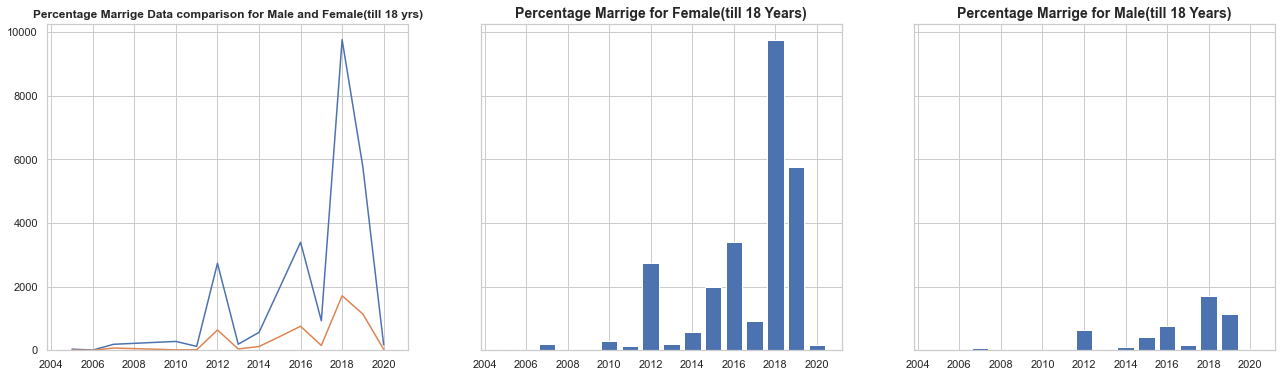

In [47]:
# now lets check the result according to the year:

df_year_wise= df_childM5.groupby('Year')[['Married by 18 Female(%)', 'Married by 18 Male(%)']].sum()
sns.set_style('whitegrid')
# plotting the results:
fig, (ax1, ax2, ax3)= plt.subplots(1, 3, sharey= True, sharex= True, figsize= (22, 6))

ax1.plot(df_year_wise.index.astype(int), df_year_wise.values)
ax1.set_title('Percentage Marrige Data comparison for Male and Female(till 18 yrs)', weight= 'bold', size= 12)

ax2.bar(x= df_year_wise.index.astype(int), height= df_year_wise['Married by 18 Female(%)'].values)
ax2.set_title('Percentage Marrige for Female(till 18 Years)', weight= 'bold', size= 14)

ax3.bar(x= df_year_wise.index.astype(int), height= df_year_wise['Married by 18 Male(%)'].values)
ax3.set_title('Percentage Marrige for Male(till 18 Years)', weight= 'bold', size= 14)

plt.show()

### Conclusion: from the above three plots we can clearly see that even for the same age(18 years) the gap of the percentages of marrige b/w male and female is very large